In [2]:
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')


In c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

In [3]:
data = []    #input data list
labels = []  # label data list
classes = 43 # ouput classes 
width = 30  # image size
height = 30 # image size
channels = 3 # represet RGB

# current path of working directory 
cur_path = os.getcwd()

#print("Current path ",cur_path)

# Get the list of all files and directories 
# in current working directory

for i in range(classes):
    
    path = os.path.join(cur_path,'gstrb-traffic-sign/Train',str(i))
    images = os.listdir(path)
    #print(images)

    for a in images:
        try:
            image = Image.open(path +'\\' + a)
            resized_image = image.resize((height, width))
            image_array = np.array(resized_image)
            data.append(image_array)
            labels.append(i)
        except:
            print('Error Loading images')
data = np.array(data)
labels = np.array(labels)
#print('data is', data)
#print('labels are',labels)

In [4]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Converting labels to one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(39209, 30, 30, 3) (39209,)
(29406, 30, 30, 3) (29406,) (9803, 30, 30, 3) (9803,)


In [5]:
# Create CNN-Model
model = Sequential()
model.add(Conv2D(filters =32, kernel_size =(5,5), activation ='relu', input_shape =X_train.shape[1:]))
model.add(Conv2D(filters =32, kernel_size =(5,5), activation ='relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Dropout(rate =0.25))
model.add(Conv2D(filters =64, kernel_size =(3,3), activation ='relu'))
model.add(Conv2D(filters =64, kernel_size =(3,3), activation ='relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Dropout(rate =0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate =0.5))
model.add(Dense(43, activation = 'softmax'))

#Compilation of the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [6]:
epochs = 50
history = model.fit(X_train, y_train, batch_size=64, epochs = epochs, validation_data = (X_test, y_test), verbose = 1)


Train on 29406 samples, validate on 9803 samples
Epoch 1/50
29406/29406 [==============================] - 156s 5ms/step - loss: 2.4465 - accuracy: 0.4423 - val_loss: 0.5623 - val_accuracy: 0.8518
Epoch 2/50
29406/29406 [==============================] - 154s 5ms/step - loss: 0.6408 - accuracy: 0.8203 - val_loss: 0.2017 - val_accuracy: 0.9532
Epoch 3/50
29406/29406 [==============================] - 152s 5ms/step - loss: 0.3559 - accuracy: 0.9005 - val_loss: 0.1081 - val_accuracy: 0.9734
Epoch 4/50
29406/29406 [==============================] - 149s 5ms/step - loss: 0.2629 - accuracy: 0.9296 - val_loss: 0.0786 - val_accuracy: 0.9798
Epoch 5/50
29406/29406 [==============================] - 149s 5ms/step - loss: 0.2240 - accuracy: 0.9382 - val_loss: 0.0671 - val_accuracy: 0.9830
Epoch 6/50
29406/29406 [==============================] - 149s 5ms/step - loss: 0.1970 - accuracy: 0.9447 - val_loss: 0.0637 - val_accuracy: 0.9846
Epoch 7/50
29406/29406 [==============================] - 149s

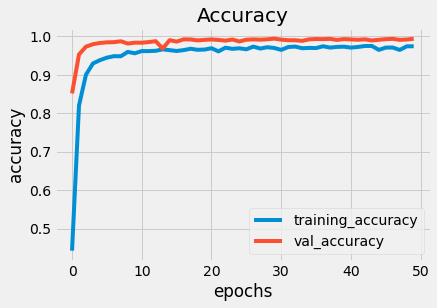

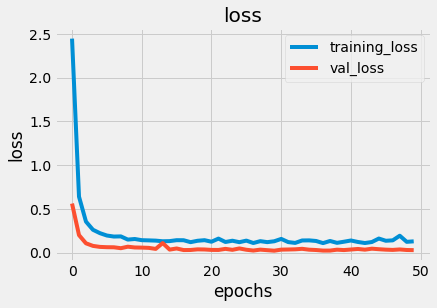

In [15]:
# Accuracy Figure
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.plot(history.history['val_accuracy'], label ='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# Loss Accuracy
plt.figure(1)
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()